In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
df = pd.read_csv('2.csv')
data=df[df['Instance Name'] == 'network.interface.packets.in']
data

,Device Name,Instance Name,Updated time (America/Los_Angeles),Packet Rate
0,csn501,network.interface.packets.in,07-Mar-2016 04:00:00 PM,559.27
1,csn501,network.interface.packets.in,07-Mar-2016 05:00:00 PM,564.02
2,csn501,network.interface.packets.in,07-Mar-2016 06:00:00 PM,580.97
3,csn501,network.interface.packets.in,07-Mar-2016 07:00:00 PM,565.64
4,csn501,network.interface.packets.in,07-Mar-2016 08:00:00 PM,549.09
...,...,...,...,...
162,csn501,network.interface.packets.in,14-Mar-2016 11:00:00 AM,576.76
163,csn501,network.interface.packets.in,14-Mar-2016 12:00:00 PM,569.96
164,csn501,network.interface.packets.in,14-Mar-2016 01:00:00 PM,573.23
165,csn501,network.interface.packets.in,14-Mar-2016 02:00:00 PM,607.92


In [6]:
data.rename(columns={'Updated time (America/Los_Angeles)':'Updated_time'}, inplace= True)
data.iloc[:, 2] = pd.to_datetime(data.iloc[:, 2])
# data['Updated_time'] = pd.to_datetime(data['Updated_time'])
data.set_index(data['Updated_time'], inplace = True)
# data['Updated_time']

/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_55150/4119020765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Updated time (America/Los_Angeles)':'Updated_time'}, inplace= True)
/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_55150/4119020765.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.iloc[:, 2] = pd.to_datetime(data.iloc[:, 2])
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result t

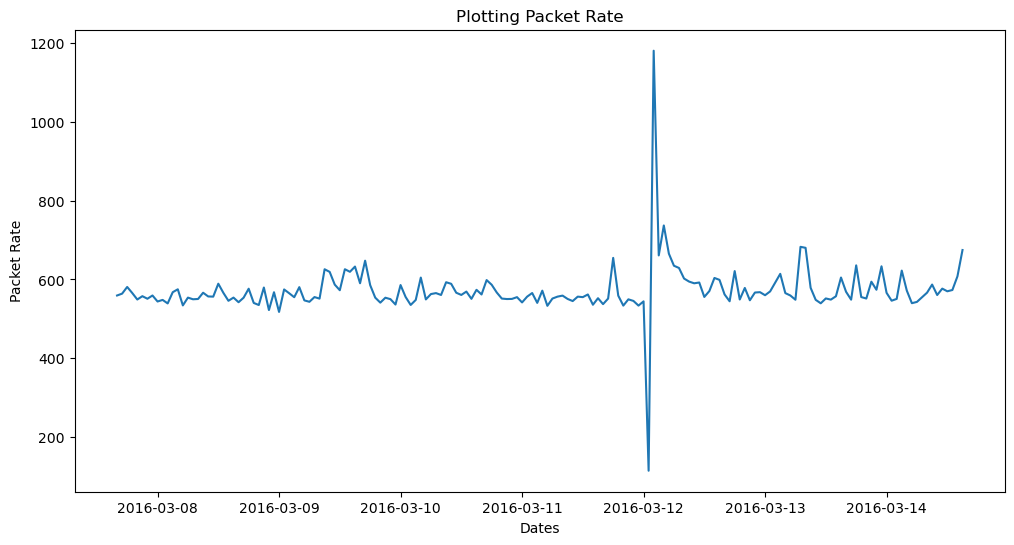

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Packet Rate'])
plt.title("Plotting Packet Rate")
plt.xlabel('Dates')
plt.ylabel('Packet Rate')
plt.show()

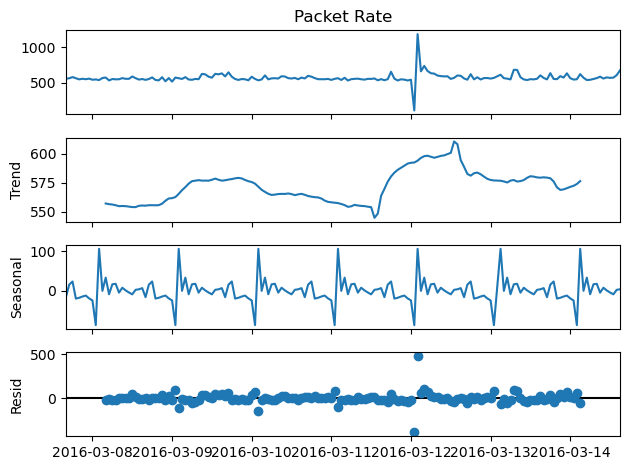

In [8]:
period = 24
result = seasonal_decompose(data['Packet Rate'], model='additve', period=period)
result.plot()
plt.show()

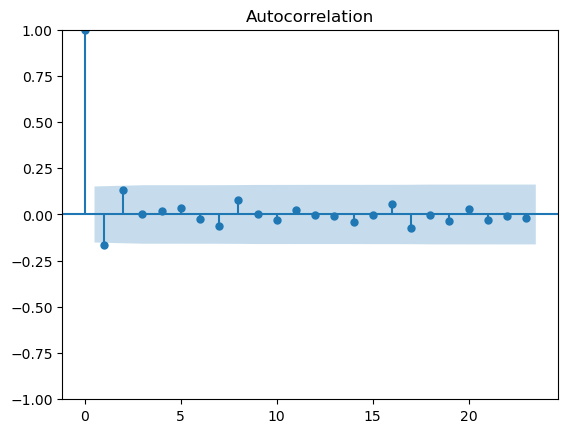

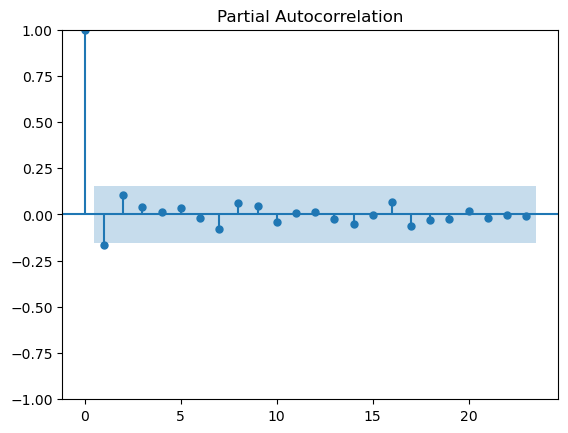

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(data['Packet Rate'])
plot_pacf(data['Packet Rate'], method='ywm')
plt.show()

In [10]:
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]
train_subset = train[['Packet Rate']]
test_subset = test[['Packet Rate']]
train_subset.reset_index(inplace=True)
test_subset.reset_index(inplace=True)

train_subset.columns=['ds','y']
test_subset.columns=['ds','y']
test_subset

,ds,y
0,2016-03-13 07:00:00,682.87
1,2016-03-13 08:00:00,680.33
2,2016-03-13 09:00:00,578.81
3,2016-03-13 10:00:00,548.28
4,2016-03-13 11:00:00,539.48
5,2016-03-13 12:00:00,551.79
6,2016-03-13 13:00:00,548.82
7,2016-03-13 14:00:00,557.37
8,2016-03-13 15:00:00,604.93
9,2016-03-13 16:00:00,568.71


In [17]:
from prophet import Prophet

# Define the Prophet model
model = Prophet(interval_width=0.99, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
# Fit the model to the data
model.fit(test_subset)

# Make future predictions
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
# forecast
# print(type(forecast))

15:15:37 - cmdstanpy - INFO - Chain [1] start processing
15:15:37 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2016-03-13 07:00:00,695.064702,635.545335,750.792961
1,2016-03-13 08:00:00,639.087197,580.144152,698.424817
2,2016-03-13 09:00:00,601.033673,542.440152,659.582944
3,2016-03-13 10:00:00,570.034853,510.470530,626.834009
4,2016-03-13 11:00:00,545.058104,491.629909,604.923091
5,2016-03-13 12:00:00,533.525994,478.371634,596.555657
6,2016-03-13 13:00:00,541.170032,478.838237,601.009985
7,2016-03-13 14:00:00,562.931170,506.754616,619.298625
8,2016-03-13 15:00:00,584.161806,524.983400,642.854903
9,2016-03-13 16:00:00,591.579443,536.025460,650.173002


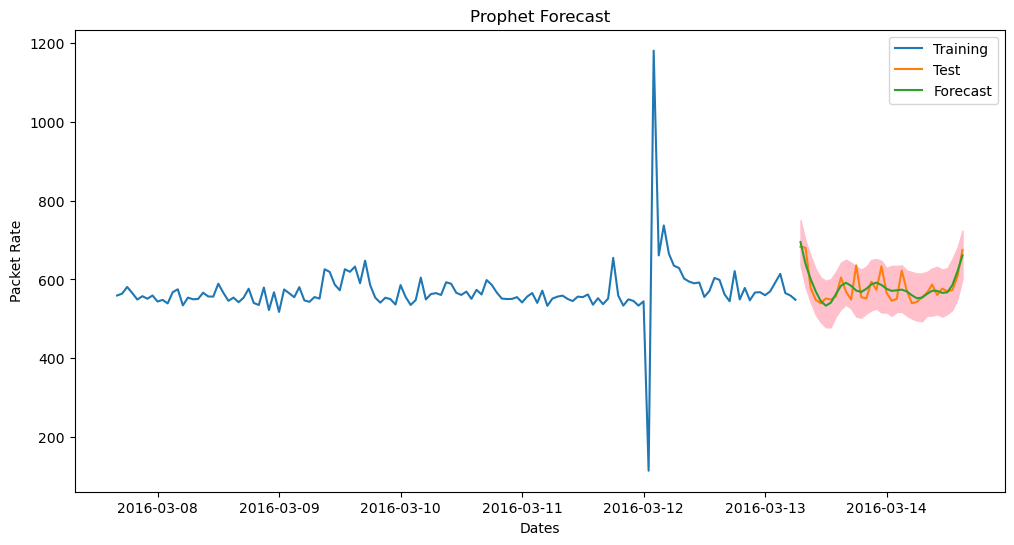

In [18]:
plt.figure(figsize=(12,6))
plt.plot(train_subset['ds'], train_subset['y'], label='Training')
plt.plot(test_subset['ds'], test_subset['y'], label='Test')
plt.plot(test_subset['ds'],forecast['yhat'], label='Forecast')
plt.fill_between(test_subset['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink')
# plt.plot(forecast['ds'], forecast['yhat'], label='Future')
plt.title("Prophet Forecast")
plt.xlabel('Dates')
plt.ylabel('Packet Rate')
plt.legend()
plt.savefig('Prophet.jpeg')
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error
observed = test['Packet Rate']
mae = mean_absolute_error(observed, forecast['yhat'])
mse = mean_squared_error(observed, forecast['yhat'])
mape = mean_absolute_percentage_error(observed, forecast['yhat'])
rmse = root_mean_squared_error(observed, forecast['yhat'])
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RSME: {rmse}')

MAE: 18.35296947316519
MSE: 544.2415815991504
MAPE: 0.03107661982469522
RSME: 23.32898586735288


if(weekly_seasonality=True && yearly_seasonality=True):

MAE: 21.525446058702542
MSE: 708.7769142928101
MAPE: 0.036625749295822886
RSME: 26.622864502018

if(daily_seasonality=True && weekly_seasonality=True):

MAE: 18.57980003268548
MSE: 552.3102272316804
MAPE: 0.03148855427160852
RSME: 23.50128139552566

if(daily_seasonality=True && weekly_seasonality=True && yearly_seasonality=True):

MAE: 18.35296947316519
MSE: 544.2415815991504
MAPE: 0.03107661982469522
RSME: 23.32898586735288

In [14]:
%store -r models
models

,Model,MAE,MAPE,MSE,RMSE
0,ARIMA,43.226426,0.073251,3196.550691,56.538046
1,SARIMA,28.428438373739624,0.04635282210911343,1739.817423160859,41.711118699465004
2,Prophet,18.35296947316519,0.03107661982469522,544.2415815991504,23.32898586735288
3,Sequential,4.567376206341909,0.007501287741478644,41.98243700601323,6.479385542319058
